In [2]:
import zipfile


In [4]:
zip_path = 'C:/Users/Prasanna P M/Human Project/ML_new-20230603T060318Z-001.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('C:/Users/Prasanna P M/Human Project/')


In [1]:
import os
current_directory = os.getcwd()
print(current_directory)


C:\Users\Prasanna P M\Human Project


In [1]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.applications.efficientnet as efn


In [2]:
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255.0,  # Normalize pixel values between 0 and 1
#     rotation_range=20,  # Randomly rotate images by 20 degrees
#     width_shift_range=0.2,  # Randomly shift the width by 20%
#     height_shift_range=0.2,  # Randomly shift the height by 20%
#     horizontal_flip=True  # Randomly flip images horizontally
# )

In [3]:
# valid_datagen = ImageDataGenerator(
#     rescale=1.0/255.0,  # Normalize pixel values between 0 and 1
#     rotation_range=20,  # Randomly rotate images by 20 degrees
#     width_shift_range=0.2,  # Randomly shift the width by 20%
#     height_shift_range=0.2,  # Randomly shift the height by 20%
#     horizontal_flip=True  # Randomly flip images horizontally
# )

In [4]:

# test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [5]:
train_path = 'C:/Users/Prasanna P M/Human Project/ML_new/Human Action Recognition/Human Action Recognition/TRAIN'
valid_path = 'C:/Users/Prasanna P M/Human Project/ML_new/Human Action Recognition/Human Action Recognition/VALID'
test_path = 'C:/Users/Prasanna P M/Human Project/ML_new/Human Action Recognition/Human Action Recognition/TEST'

train_batches = ImageDataGenerator(preprocessing_function=efn.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224, 224), batch_size=32)


Found 10455 images belonging to 15 classes.


In [6]:


valid_batches = ImageDataGenerator(preprocessing_function=efn.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224, 224), batch_size=32)

Found 1845 images belonging to 15 classes.


In [17]:
test_batches = ImageDataGenerator(preprocessing_function=efn.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224, 224), batch_size=32,shuffle = False)

Found 300 images belonging to 15 classes.


In [9]:
import tensorflow as tf
efficient = tf.keras.applications.EfficientNetB0()
efficient.summary()
     

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [11]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

x = efficient.layers[-3].output
x = Flatten()(x)
x = Dropout(0.5)(x)  # Add another dropout layer with a dropout rate of 0.4
output = Dense(units=15, activation='softmax')(x)

model = Model(inputs=efficient.input, outputs=output)

In [12]:
for layer in model.layers[:-35]:
    layer.trainable = False
    print(layer.name)

input_1
rescaling
normalization
stem_conv_pad
stem_conv
stem_bn
stem_activation
block1a_dwconv
block1a_bn
block1a_activation
block1a_se_squeeze
block1a_se_reshape
block1a_se_reduce
block1a_se_expand
block1a_se_excite
block1a_project_conv
block1a_project_bn
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_dwconv_pad
block2a_dwconv
block2a_bn
block2a_activation
block2a_se_squeeze
block2a_se_reshape
block2a_se_reduce
block2a_se_expand
block2a_se_excite
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_dwconv
block2b_bn
block2b_activation
block2b_se_squeeze
block2b_se_reshape
block2b_se_reduce
block2b_se_expand
block2b_se_excite
block2b_project_conv
block2b_project_bn
block2b_drop
block2b_add
block3a_expand_conv
block3a_expand_bn
block3a_expand_activation
block3a_dwconv_pad
block3a_dwconv
block3a_bn
block3a_activation
block3a_se_squeeze
block3a_se_reshape
block3a_se_reduce
block3a_se_expand
block3a_se_exci

In [13]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
____________________________________________________________________________________________

In [14]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=25,
            verbose=2
)

Epoch 1/25
327/327 - 698s - loss: 1.8215 - accuracy: 0.4467 - val_loss: 1.0919 - val_accuracy: 0.6585
Epoch 2/25
327/327 - 672s - loss: 1.0724 - accuracy: 0.6683 - val_loss: 0.8969 - val_accuracy: 0.7285
Epoch 3/25
327/327 - 677s - loss: 0.8631 - accuracy: 0.7327 - val_loss: 0.8042 - val_accuracy: 0.7566
Epoch 4/25
327/327 - 686s - loss: 0.7292 - accuracy: 0.7719 - val_loss: 0.7621 - val_accuracy: 0.7691
Epoch 5/25
327/327 - 712s - loss: 0.6299 - accuracy: 0.8012 - val_loss: 0.7419 - val_accuracy: 0.7729
Epoch 6/25
327/327 - 813s - loss: 0.5570 - accuracy: 0.8243 - val_loss: 0.7325 - val_accuracy: 0.7783
Epoch 7/25
327/327 - 703s - loss: 0.4759 - accuracy: 0.8483 - val_loss: 0.7152 - val_accuracy: 0.7805
Epoch 8/25
327/327 - 682s - loss: 0.4160 - accuracy: 0.8692 - val_loss: 0.7207 - val_accuracy: 0.7881
Epoch 9/25
327/327 - 681s - loss: 0.3526 - accuracy: 0.8905 - val_loss: 0.7384 - val_accuracy: 0.7864
Epoch 10/25
327/327 - 678s - loss: 0.3094 - accuracy: 0.9056 - val_loss: 0.7320 - 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [19]:
test_labels = test_batches.classes

In [20]:
predictions = model.predict(x=test_batches)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the testing accuracy
testing_accuracy = np.mean(predicted_labels == test_labels)

print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.81


In [21]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [23]:

test_batches.class_indices

{'calling': 0,
 'clapping': 1,
 'cycling': 2,
 'dancing': 3,
 'drinking': 4,
 'eating': 5,
 'fighting': 6,
 'hugging': 7,
 'laughing': 8,
 'listening_to_music': 9,
 'running': 10,
 'sitting': 11,
 'sleeping': 12,
 'texting': 13,
 'using_laptop': 14}

Confusion matrix, without normalization
[[16  0  0  0  0  1  1  0  0  2  0  0  0  0  0]
 [ 0 14  0  0  1  1  1  0  1  1  0  0  0  1  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0 14  0  0  2  0  0  0  2  0  0  0  0]
 [ 1  0  0  0 13  1  1  0  1  1  0  2  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  1  0  0  1]
 [ 0  0  0  0  0  0 17  1  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0 15  1  0  0  0  1  3  0]
 [ 0  0  0  0  0  1  0  0 18  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  0 17  0  1  0  1  0]
 [ 0  0  0  0  1  0  0  0  0  1 18  0  0  0  0]
 [ 0  0  0  1  0  0  0  1  0  0  0 16  0  1  1]
 [ 0  0  0  1  0  0  1  0  0  0  0  1 17  0  0]
 [ 0  0  0  0  1  0  0  1  0  3  0  1  0 13  1]
 [ 0  0  0  0  0  0  0  0  1  1  0  0  1  0 17]]


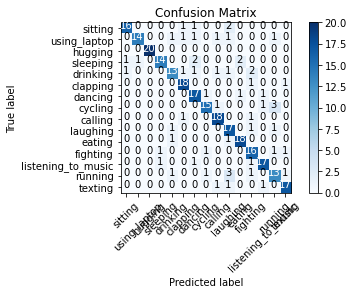

In [24]:
cm_plot_labels = ['sitting','using_laptop','hugging','sleeping','drinking','clapping','dancing','cycling','calling','laughing','eating','fighting','listening_to_music','running','texting']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [25]:
model.save_weights('KerasEfficientNetB0.h5')

In [26]:

def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [27]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [28]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [29]:

tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\PRASAN~1\AppData\Local\Temp\tmpmlxjdg0o\assets


INFO:tensorflow:Assets written to: C:\Users\PRASAN~1\AppData\Local\Temp\tmpmlxjdg0o\assets


In [30]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

4802720

In [32]:
import os
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "MB")
     

File size: 4.58 Megabytes
